<a href="https://colab.research.google.com/github/RuthStowers/MAT421/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Project 
By Ruth Stowers

In 2001, Richard Atkinson, president of the University of California, recommended that colleges stop using the SAT, a standardized test that assesses test-takers’ readiness for college, as a determining factor for college acceptance, and instead use tests more closely tied to current highschool curriculum (DePaul University, Chicago, 2011). Twenty years later the University of California voted to suspend and then eliminate SAT testing requirements altogether (“University of California” 2021). This is not an isolated change, but one that has swept through the US with around 80% of colleges not requiring SAT scores for 2023 admission applications (IvyWise, 2022). 

The origins of the SAT began in 1926 when Robert Yerkes, a Psychologist, was hired by the US Army to create a test which would sort new recruits and find who was best suited to serve in officer positions. Soon after, Carl Brigham used the Army test as a template to develop an intelligence test for elite colleges in the US that wanted to identify students who they felt were worthy of admittance but didn’t attend preparatory school. Over the next 40 years, the SAT would grow in popularity and become a major deciding factor in the college admission of students throughout the country.
Since 2001, there has been a lot of controversy over the use of SAT scores, especially in regards to diversity and equality. Many advocacy groups claim that the SAT is discriminatory to underrepresented students and is used as a means of excluding groups who traditionally test poorly in standardized testing, or do not have the financial means to prepare for or take the exams (Tugend, 2021). Others suggest that preparing for the SAT wastes the time of students who could be using that time to more adequately prepare for college though focusing on highschool courses (Cline, 2022). Still others maintain that the SAT or other stanaderdized tests are objective and the best way for colleges to compare students from different highschools (Westrick et al., 2019). Research into the usefulness of the SAT has shown mixed results and many colleges have suspended SAT test requirements only temporarily to see what kind of an impact the change would have on their student population, and still encourage their students to submit an SAT score with their application if possible (“What You Need to Know About Applying Test-Optional,” 2022). 

This project aims to assess the situation from an academic standpoint and answer the following questions: 

Is the SAT useful in predicting college success? 

Is it significant enough to offset the possible drawbacks of its continued use? 

To answer these questions we analyzed highschool GPA, SAT scores and first year college GPA of students from the University of California using linear regression and analysis to determine whether highschool GPA or SAT scores, or a combination of the two, best predict college success as measured by first year college GPA, and whether the effect of the SAT in the model is significant enough to warrant its use when considering the possible discrimination or negative sideeffects some people associate with it. The data which we used was collected by the University of California in 2019 and the linear regression model was developed using python in the following steps.

#Imports

First, we read in the data file.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
%matplotlib inline

url = 'https://raw.githubusercontent.com/RuthStowers/MAT421/main/SAT2.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.head()


,HighSchoolGPA,SATScore,FamilyIncome,FirstYearCollegeGPA
0,3.12,1240,45696,1.85
1,3.24,1460,115754,2.84
2,3.66,1670,48209,3.27
3,3.43,1860,63582,2.61
4,3.35,1890,33641,3.41


To get a quick overview of the data, we looked at the data Statistics.

In [3]:
df1.describe()

,HighSchoolGPA,SATScore,FamilyIncome,FirstYearCollegeGPA
count,900.000000,900.000000,900.000000,900.000000
mean,3.275067,1789.977778,67927.000000,2.960178
std,0.388604,268.663730,38805.026553,0.604086
min,1.810000,1070.000000,7959.000000,1.050000
25%,3.070000,1580.000000,37665.000000,2.550000
50%,3.350000,1795.000000,60102.000000,3.040000
75%,3.570000,2000.000000,91881.250000,3.420000
max,3.960000,2400.000000,209401.000000,4.000000


Then we looked at the data Information.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HighSchoolGPA        900 non-null    float64
 1   SATScore             900 non-null    int64  
 2   FamilyIncome         900 non-null    int64  
 3   FirstYearCollegeGPA  900 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.2 KB


#Data Analysis

We visualized the realtionships across the entire dataset to explore the relationships.

In [5]:
import seaborn as sns

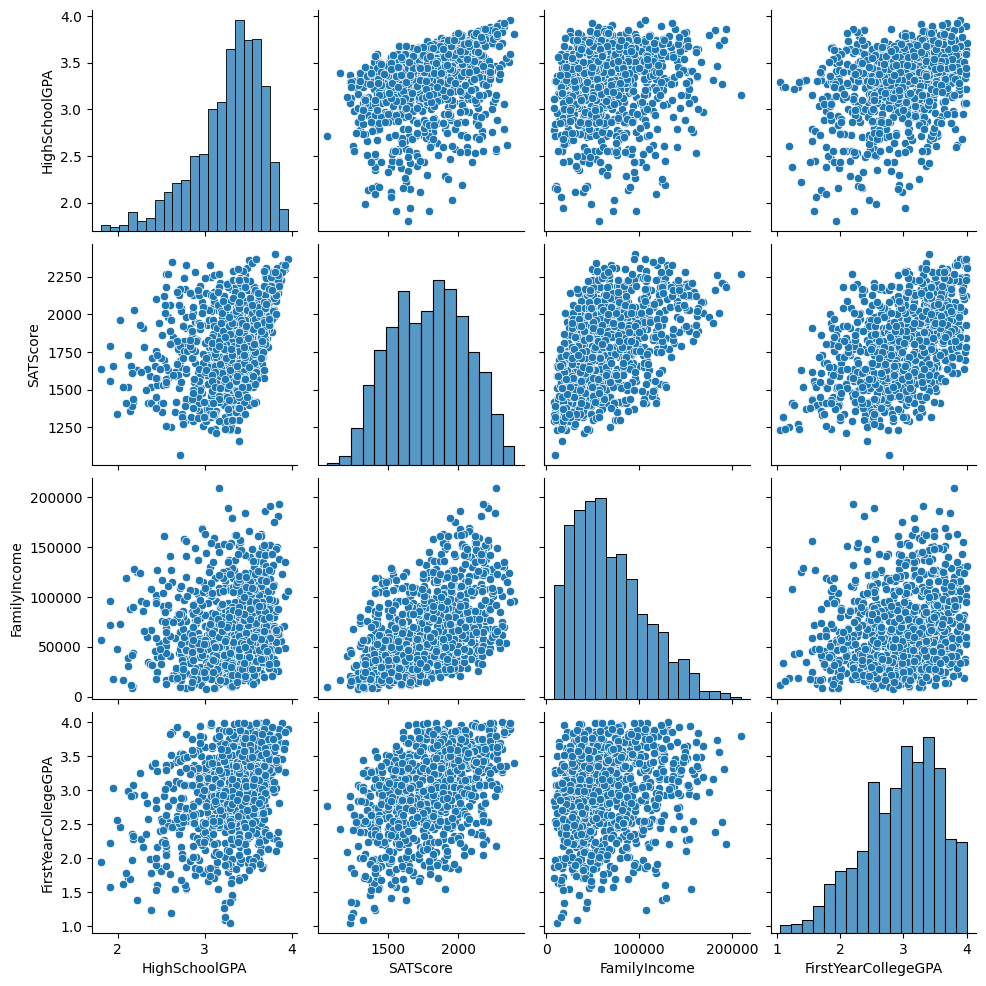

In [6]:
sns.pairplot(df1)


Then we looked specifically at the relationships between first year college GPA and the other variables.

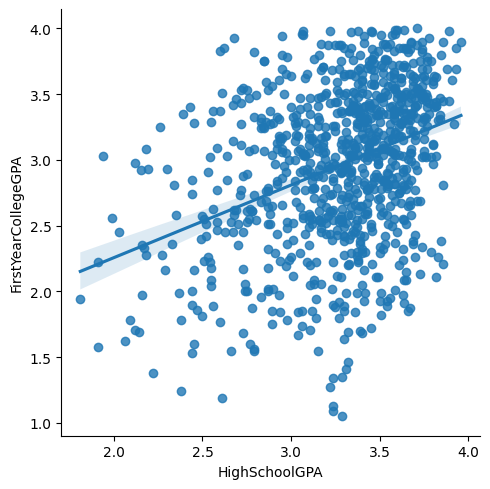

In [7]:
sns.lmplot(x='HighSchoolGPA',y ='FirstYearCollegeGPA', data=df1)

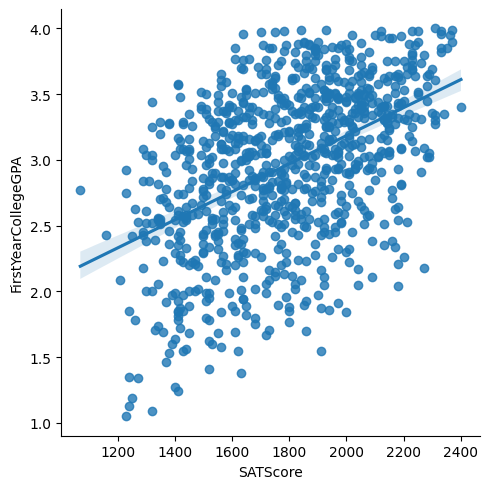

In [8]:
sns.lmplot(x='SATScore',y ='FirstYearCollegeGPA', data=df1)

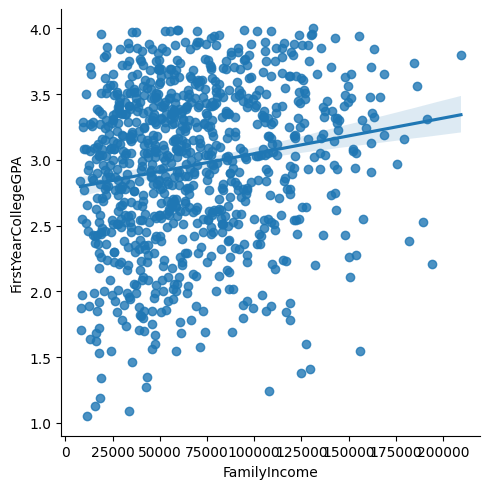

In [9]:
sns.lmplot(x='FamilyIncome',y ='FirstYearCollegeGPA', data=df1)

We also calculated the correlation coefficients.

In [23]:
pearsoncorr = df1.corr(method='pearson')
pearsoncorr

,HighSchoolGPA,SATScore,FamilyIncome,FirstYearCollegeGPA
HighSchoolGPA,1.000000,0.360675,0.111207,0.354813
SATScore,0.360675,1.000000,0.471143,0.474869
FamilyIncome,0.111207,0.471143,1.000000,0.173997
FirstYearCollegeGPA,0.354813,0.474869,0.173997,1.000000


From the plots and correleation coefficients, we can see that both highschool GPA and SAT score have a weak positive linear relationship with first year college GPA while family income did not seem to have a linear relationship.

We will continue with our analysis by creating our linear regression models. First we will model first year college GPA with highschool GPA as the sole factor. Then we will model first year college GPA with both highschool GPA and SAT scores as factors.

#Linear Regression Model with Highschool GPA

To create our linear regression model, we will split the data into two sets, a training set and a testing set. The training set will contain 70% of our data and be used to train our model. The testing set will contain 30% of our data and will be used to test how well our model can predict our data.

In [26]:
y = df1['FirstYearCollegeGPA']

In [39]:
W = df1[['HighSchoolGPA']]

In [40]:
W_train, W_test, y_train, y_test = train_test_split(W, y, test_size=0.3, random_state=101)

Training our model:

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [41]:
lm.fit(W_train,y_train)

LinearRegression()

In [42]:
print("Parameters:", lm.coef_, lm.intercept_)

Parameters: [0.51512502] 1.276052731424208


Thus our model equation is:

First year college GPA (predicted) = 1.276 + 0.515 Highschool GPA

This means that for every 0.1 point increase in Highschool GPA, the expected value of first year college GPA increases by 0.0515 points.

Testing our model and evaluating its usefulness:

In [46]:
predictions = lm.predict(W_test)

Text(0, 0.5, 'Predicted Y')

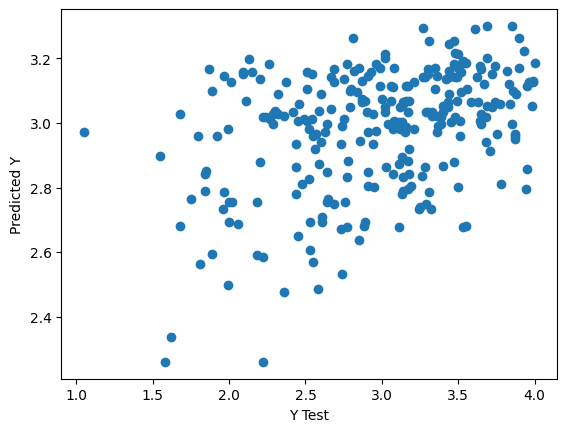

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
resid = y_test - predictions
R2 = 1 - resid.var() / y_test.var()
R2

0.1507984208285612

As we can see from the analysis, our model with Highschool GPA as the sole factor can only explain 15% of the variation in first year college GPA.



Now we will check the normality to make sure our model assumptions aren't violated.

<ipython-input-68-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


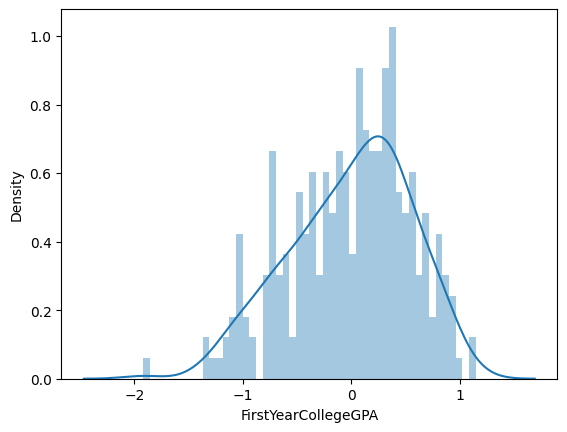

In [68]:
sns.distplot((y_test-predictions),bins=50);

Although our residuals do show a slight left skew with a possible outlier, the effect of this considering the size of our sample is minimal.



Let's compare this model with our second model including SAT Scores.

#Linear Regression Model with both Highschool GPA and SAT Score as Factors

We will again split the data into training and testing sets.





In [27]:
X = df1[['HighSchoolGPA', 'SATScore']]

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
lm2 = LinearRegression()

Now we will use our training set to train our second model.

In [63]:
lm2.fit(X_train,y2_train)

LinearRegression()

In [64]:
print("Parameters:", lm2.coef_, lm.intercept_)

Parameters: [0.32746747 0.00084737] 1.276052731424208


Thus our model equation is:

First year college GPA (predicted) = 1.276 + 0.327 Highschool GPA + 0.000847 SAT score

This means that for every 0.1 point increase in Highschool GPA, the expected value of first year college GPA increases by 0.0327 holding all other variables constant.

Also for every 100 point increase in SAT score, the expected value of first year college GPA increases by 0.0847 holding all other variables constant.

Now we will test and evaluate this model.

In [65]:
predictions2 = lm2.predict(X_test)

Text(0, 0.5, 'Predicted Y')

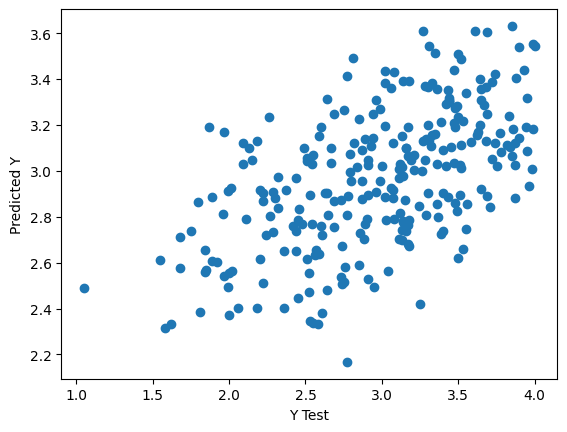

In [66]:
plt.scatter(y2_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
resid2 = y2_test - predictions2
R2_2 = 1 - resid2.var() / y2_test.var()
R2_2

0.31551231559819826

As we can see from our analysis, our model which includes both highschool GPA and SAT score can explain 32% of the variability in first year college GPA. That is twice as much as the first model.

Now we will check the normality to make sure our model assumptions aren't violated.

<ipython-input-69-3dcfce09ad0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y2_test-predictions2),bins=50);


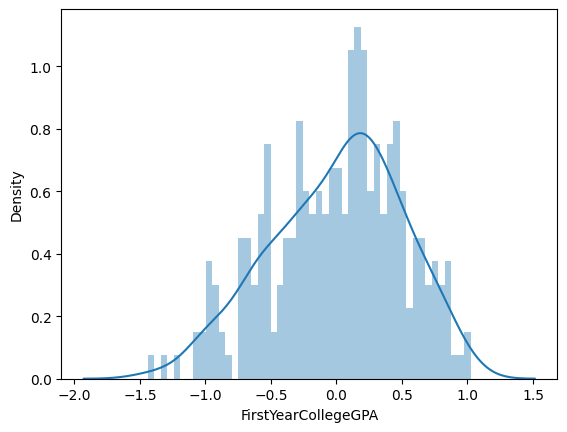

In [69]:
sns.distplot((y2_test-predictions2),bins=50);

Our residuals for this model also show a slight left skew, however, as with the previous model, the effect of this is minimal.

#Conclusions

To summarize the findings of our analysis, the data seems to indicate that admissions test scores are currently useful in predicting student success, as measured by college freshman g.p.a. beyond the predictive information of high school grades alone. Our data also seems to show that these results are not impacted by family income level. We also conclude that the improvement of adding SAT scores as a factor in the model was significant enough to offset possible drawbacks. These conclusions were reached by performing a linear regression analysis with high school g.p.a., SAT scores, and family income as predictors for first year college g.p.a. for a sample of 900 students. When only using high school g.p.a. to predict first year college g.p.a., our model accounted for approximately 12% of the variance in first year college g.p.a. When SAT scores were used in conjunction with high school g.p.a., the amount of variance explained was approximately 32%, an increase of 20% which is a significant improvement in our model’s ability to predict first year college g.p.a..

Overall, by using our model with high school g.p.a. and SAT scores as predictors, we are 95% confident that for every 0.1 point increase in Highschool g.p.a, the average first year college g.p.a. is expected to increase by 0.0327 points when controlling for SAT scores. Also we are 95% confident that for every 100 points increase in SAT score, the average first year college g.p.a is expected to increase by between 0.0845 points when controlling for Highschool g.p.a.. 

#References


Cline, N. (2022, November 3). More Colleges Making SAT, ACT Exams Optional. The74million. https://www.the74million.org/article/more-virginia-colleges-make-sat-act-exams-optional/

DePaul University, Chicago. (2011). A BRIEF HISTORY OF THE TEST-OPTIONAL MOVEMENT IN HIGHER EDUCATION. Enrollment Matters. Retrieved February 25, 2023, from https://offices.depaul.edu/enrollment-management/test-optional/Documents/HistoryOfTOinHigherEd_EMatters3-18-11.pdf

IvyWise. (2022, February 2). List of Colleges Extending Test-Optional Policies. https://www.ivywise.com/blog/colleges-going-test-optional/

Tugend, A. (2021, April 8). Questioning their fairness, a record number of colleges stop requiring the SAT and ACT. The Hechinger Report. https://hechingerreport.org/questioning-their-fairness-a-record-number-of-colleges-stop-requiring-the-sat-and-act/

University of California Board of Regents unanimously approved changes to standardized testing requirement for undergraduates. (2021, November 8). University of California. https://www.universityofcalifornia.edu/press-room/university-california-board-regents-unanimously-approved-changes-standardized-testing

Westrick, P., Marini, J., Young, L., NG, H., Shmueli, D., & Shaw, E. (2019, May). Validity of the SAT®  for Predicting First-Year Grades and Retention to the Second Year. College Board. Retrieved February 25, 2023, from https://satsuite.collegeboard.org/media/pdf/national-sat-validity-study.pdf

What You Need to Know About Applying Test-Optional. (2022, September 29). Admissions | University of Pittsburgh. https://admissions.pitt.edu/blog/applying-test-optional/
